<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Finance with Python

**Chapter 03 &mdash; Three State Economy**

In [1]:
%matplotlib inline
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.family'] = 'serif'

## Attainable Contingent Claims 

In [2]:
import numpy as np

In [3]:
np.random.seed(100)

In [4]:
B = (10, np.array((11, 11, 11)))

In [5]:
S = (10, np.array((20, 10, 5)))

In [6]:
n = 1000

In [7]:
b = np.random.random(n)

In [8]:
b[:5]

array([ 0.54340494,  0.27836939,  0.42451759,  0.84477613,  0.00471886])

In [9]:
s = np.random.random(n)

In [10]:
A = [b[i] * B[1] + s[i] * S[1] for i in range(n)]

In [11]:
A = np.array(A)

In [12]:
A[:3]

array([[  6.53209991,   6.25477713,   6.11611575],
       [ 10.70680852,   6.88443588,   4.97324956],
       [ 23.73471174,  14.20220262,   9.43594806]])

In [13]:
%matplotlib inline
from pylab import plt
from mpl_toolkits.mplot3d import Axes3D

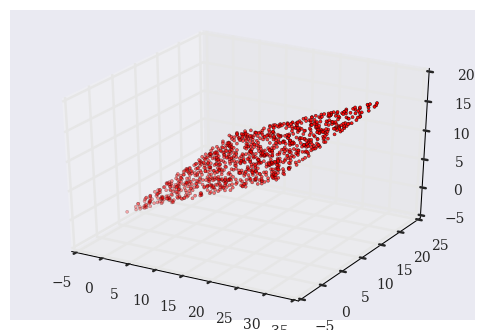

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c='r', marker='.')
# plt.savefig('../../images/ch03/incom_01.png');

## Martingale Measures

In [15]:
Q = np.array((0.3, 0.3, 0.4))

In [16]:
np.dot(Q, S[1])

11.0

## Super-Replication

In [17]:
C1 = np.array((1, 0, 0))

In [18]:
1 / B[1][0] * B[1] >= C1

array([ True,  True,  True], dtype=bool)

In [19]:
1 / B[1][0] * B[0]

0.90909090909090917

In [20]:
def V(phi, t):
    return phi[0] * B[t] + phi[1] * S[t]

In [21]:
phi = np.array((0.04, 0.03))

In [22]:
V(phi, 0)

0.69999999999999996

In [23]:
V(phi, 1)

array([ 1.04,  0.74,  0.59])

In [24]:
from scipy.optimize import minimize

In [25]:
cons = ({'type': 'ineq', 'fun': lambda phi: V(phi, 1) - C1})

In [26]:
res = minimize(lambda phi: V(phi, 0),
               (0.01, 0.01),
               method='SLSQP',
               constraints=cons)

In [27]:
res

     fun: 0.36363636363557533
     jac: array([ 10.,  10.,   0.])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([-0.03030303,  0.06666667])

In [28]:
V(res['x'], 0)

0.36363636363557533

In [29]:
V(res['x'], 1).round(2)

array([ 1.  ,  0.33, -0.  ])

## Approximative Replication

In [30]:
M = np.array((B[1], S[1])).T

In [31]:
M

array([[11, 20],
       [11, 10],
       [11,  5]])

In [32]:
reg = np.linalg.lstsq(M, C1)

In [33]:
reg

(array([-0.04545455,  0.07142857]),
 array([ 0.07142857]),
 2,
 array([ 28.93835724,   7.11136277]))

In [34]:
V(reg[0], 0)

0.25974025974025977

In [35]:
V(reg[0], 1).round(6)

array([ 0.928571,  0.214286, -0.142857])

In [36]:
V(reg[0], 1) - C1

array([-0.07142857,  0.21428571, -0.14285714])

In [37]:
np.sum((V(reg[0], 1) - C1) ** 2)

0.071428571428571425

## Capital Market Line

In [38]:
mu_S = 7 / 6 - 1

In [39]:
mu_S

0.16666666666666674

In [40]:
sigma_S = (S[1] / S[0]).std()

In [41]:
sigma_S

0.62360956446232352

In [42]:
s = np.linspace(-2, 2, 25)

In [43]:
b = (1 - s)

In [44]:
i = 0.1

In [45]:
mu = b * i + s * mu_S

In [46]:
sigma = np.abs(s * sigma_S)

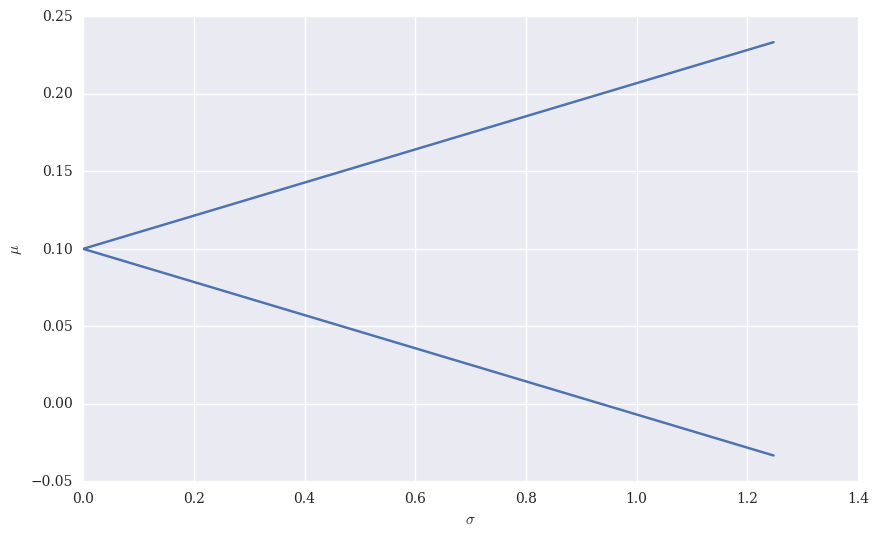

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(sigma, mu)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
# plt.savefig('../../images/ch03/incom_02.png');

## Capital Asset Pricing Model

In [48]:
beta = np.linspace(0, 2, 25)

In [49]:
mu = i + beta * (mu_S - i)

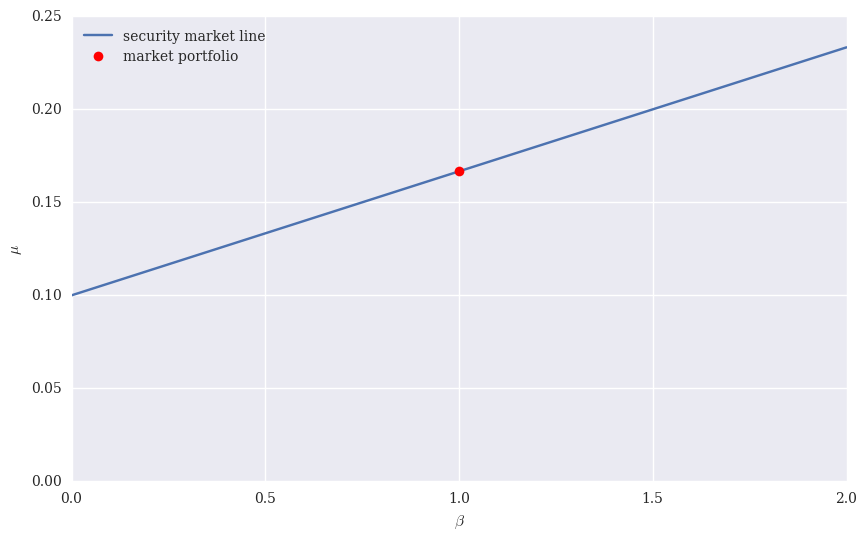

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(beta, mu, label='security market line')
plt.xlabel('$\\beta$')
plt.ylabel('$\mu$')
plt.ylim(0, 0.25)
plt.plot(1, mu_S, 'ro', label='market portfolio')
plt.legend(loc=0)
# plt.savefig('../../images/ch03/incom_03.png');

In [51]:
T1 = np.array((5, 3, 0))

In [52]:
rT = T1 / 4

In [53]:
cov = np.cov(S[1] / S[0], rT)

In [54]:
cov

array([[ 0.58333333,  0.45833333],
       [ 0.45833333,  0.39583333]])

In [55]:
sigma_S = (S[1] / S[0]).var()

In [56]:
sigma_S

0.38888888888888884

In [57]:
beta = cov[1, 0]  / sigma_S ** 2

In [58]:
beta

3.0306122448979602

In [59]:
mu_T = i + beta * (mu_S - i)

In [60]:
mu_T

0.3020408163265309

In [61]:
T0 = T1.mean() / (1 + mu_T)

In [62]:
T0

2.048066875653082

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Python Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>